# 1- Librerias y config

In [2]:
%load_ext autoreload
%autoreload 2

import sys
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 15)

sys.path.append('./../')
import config
from utils import tools
from data_analysis import analysis_plotter, analysis_utils, reporter, dos_plotter
from data_handling import data_processing


from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from tabulate import tabulate
from autogluon.tabular import TabularDataset, TabularPredictor
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import time

c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Processor

In [3]:
MaterialsProcessor = data_processing.DataProcessor(config.PATH_TEST_FIGURES)
materials_data, supercon_data = MaterialsProcessor.processor()
materials_data.head()

2024-06-25 14:47:18: · MODULE: DataProcessor...
2024-06-25 14:47:30:   - 1 rows (0.0017 %) where dropped because of null on ICSD.


bravais_lattice material_name    ICSD  fermi_energy  is_magnetic  \
0             BCC      Ag1F6Sb1   28676      -2.03066        False   
1             BCC      Ag1F6Sb1  411795      -2.03253        False   
2             BCC        Ag1Te3   37186       5.57824        False   
3             BCC     Ag3Au1Se2   15734       2.21332        False   
4             BCC     Ag3Au1Se2  171959       2.22832        False   

   is_superconductor  DOS_m15_00  DOS_m14_98  DOS_m14_97  DOS_m14_95  \
0              False         0.0         0.0         0.0         0.0   
1              False         0.0         0.0         0.0         0.0   
2              False         0.0         0.0         0.0         0.0   
3              False         0.0         0.0         0.0         0.0   
4              False         0.0         0.0         0.0         0.0   

   DOS_m14_94  DOS_m14_92  DOS_m14_91  DOS_m14_89  DOS_m14_88  DOS_m14_86  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_85  DOS_m14_83  DOS_m14_82  DOS_m14_80  DOS_m14_79  DOS_m14_77  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_76  DOS_m14_74  DOS_m14_73  DOS_m14_71  DOS_m14_70  DOS_m14_68  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_67  DOS_m14_65  DOS_m14_64  DOS_m14_62  DOS_m14_61  DOS_m14_59  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_58  DOS_m14_56  DOS_m14_55  DOS_m14_53  DOS_m14_52  DOS_m14_50  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_49  DOS_m14_47  DOS_m14_46  DOS_m14_44  DOS_m14_43  DOS_m14_41  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   DOS_m14_40  DOS_m14_38  DOS_m14_37  DOS_m14_35  DOS_m14_34  DOS_m14_32  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0 

In [4]:
materials_data.columns

Index(['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy',
       'is_magnetic', 'is_superconductor', 'DOS_m15_00', 'DOS_m14_98',
       'DOS_m14_97', 'DOS_m14_95',
       ...
       'DOS_p14_86', 'DOS_p14_88', 'DOS_p14_89', 'DOS_p14_91', 'DOS_p14_92',
       'DOS_p14_94', 'DOS_p14_95', 'DOS_p14_97', 'DOS_p14_98', 'DOS_p15_00'],
      dtype='object', length=2005)

# 3. EDA

## - Analysis

In [4]:
stats_reporter = reporter.StatsReporter(materials_data, config.PATH_TEST_FIGURES)  # Assuming you have a config module
stats_reporter.stats_report()

plotter = analysis_plotter.AnalysisPlotter(materials_data, config.PATH_TEST_FIGURES)
plotter.workflow()

2024-06-24 22:58:55: · MODULE: StatsReporter...
2024-06-24 22:58:58: · MODULE: AnalysisPlotter...


## - EDA

In [5]:
Dos_Plotter = dos_plotter.DosPlotter(materials_data, config.PATH_TEST_FIGURES)

Dos_Plotter.plot_dos(by='Bravais', method='average', is_supercon=True)
Dos_Plotter.plot_dos(by='Bravais', method='average', is_supercon=False)
Dos_Plotter.plot_dos(by='Bravais', method='median', is_supercon=True)
Dos_Plotter.plot_dos(by='Bravais', method='median', is_supercon=False)
Dos_Plotter.plot_dos(by='Bravais', method='median', is_supercon=None, filter_bravais=['TRI']) 
Dos_Plotter.plot_dos(by='ICSD', ICSD=171959)

2024-06-24 22:59:02: · MODULE: DosPlotter...


In [9]:
materials_data_encoded = pd.get_dummies(materials_data, columns=['bravais_lattice'])

correlation_columns = [col for col in materials_data_encoded.columns if col.startswith('bravais_lattice')] + ['fermi_energy', 'is_magnetic', 'is_superconductor']

correlation_matrix = materials_data_encoded[correlation_columns].corr()

correlation_matrix

,bravais_lattice_BCC,bravais_lattice_BCT,bravais_lattice_CUB,bravais_lattice_FCC,bravais_lattice_HEX,bravais_lattice_MCL,bravais_lattice_MCLC,bravais_lattice_ORC,bravais_lattice_ORCC,bravais_lattice_ORCF,bravais_lattice_ORCI,bravais_lattice_RHL,bravais_lattice_TET,bravais_lattice_TRI,fermi_energy,is_magnetic,is_superconductor
bravais_lattice_BCC,1.000000,-0.058627,-0.051959,-0.074445,-0.078631,-0.044819,-0.046672,-0.066310,-0.041561,-0.012859,-0.022244,-0.046510,-0.049967,-0.029908,0.043294,0.016512,0.027606
bravais_lattice_BCT,-0.058627,1.000000,-0.095944,-0.137466,-0.145195,-0.082759,-0.086181,-0.122445,-0.076744,-0.023745,-0.041074,-0.085883,-0.092266,-0.055226,0.065114,0.015738,0.055246
bravais_lattice_CUB,-0.051959,-0.095944,1.000000,-0.121831,-0.128681,-0.073346,-0.076379,-0.108518,-0.068016,-0.021045,-0.036402,-0.076115,-0.081772,-0.048945,0.096754,-0.008351,0.071183
bravais_lattice_FCC,-0.074445,-0.137466,-0.121831,1.000000,-0.184372,-0.105089,-0.109434,-0.155482,-0.097451,-0.030152,-0.052156,-0.109055,-0.117161,-0.070127,0.123615,0.068762,0.033915
bravais_lattice_HEX,-0.078631,-0.145195,-0.128681,-0.184372,1.000000,-0.110998,-0.115587,-0.164225,-0.102930,-0.031847,-0.055089,-0.115187,-0.123748,-0.074070,0.075863,0.001794,0.012676
bravais_lattice_MCL,-0.044819,-0.082759,-0.073346,-0.105089,-0.110998,1.000000,-0.065883,-0.093606,-0.058669,-0.018153,-0.031400,-0.065655,-0.070535,-0.042219,-0.192482,-0.057466,-0.056309
bravais_lattice_MCLC,-0.046672,-0.086181,-0.076379,-0.109434,-0.115587,-0.065883,1.000000,-0.097476,-0.061095,-0.018903,-0.032698,-0.068370,-0.073451,-0.043965,-0.135746,-0.019302,-0.058580
bravais_lattice_ORC,-0.066310,-0.122445,-0.108518,-0.155482,-0.164225,-0.093606,-0.097476,1.000000,-0.086802,-0.026857,-0.046457,-0.097139,-0.104358,-0.062464,-0.057608,-0.032218,-0.036611
bravais_lattice_ORCC,-0.041561,-0.076744,-0.068016,-0.097451,-0.102930,-0.058669,-0.061095,-0.086802,1.000000,-0.016833,-0.029118,-0.060883,-0.065408,-0.039151,0.012251,-0.035101,-0.025164
bravais_lattice_ORCF,-0.012859,-0.023745,-0.021045,-0.030152,-0.031847,-0.018153,-0.018903,-0.026857,-0.016833,1.000000,-0.009009,-0.018838,-0.020238,-0.012113,-0.022164,-0.016515,0.000433


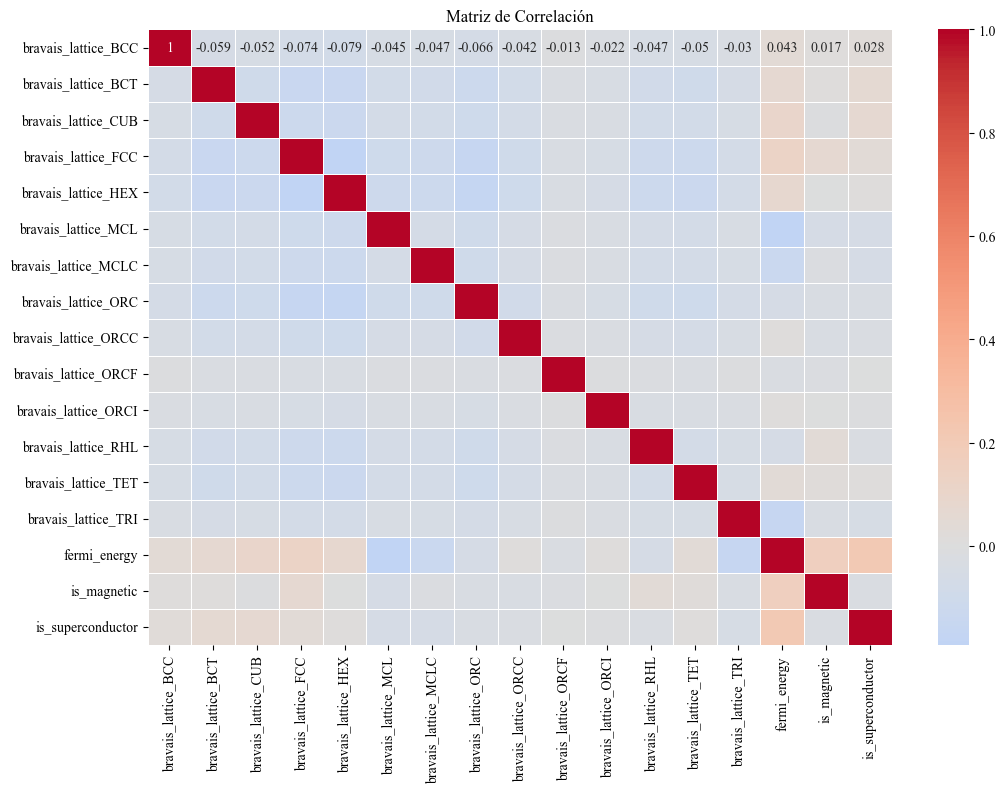

In [12]:
materials_data_encoded = pd.get_dummies(materials_data, columns=['bravais_lattice'])

correlation_columns = [col for col in materials_data_encoded.columns if col.startswith('bravais_lattice')] + ['fermi_energy', 'is_magnetic', 'is_superconductor']

correlation_matrix = materials_data_encoded[correlation_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [13]:
df = materials_data.copy()
df.dropna(inplace=True)  # Drop rows with missing values
df['is_superconductor'] = df['is_superconductor'].astype(bool)

pca_cols = df.loc[:, 'DOS_m15_00':'DOS_p15_00'].columns.tolist()
other_cols = ['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic']
categorical_cols = ['bravais_lattice', 'is_magnetic']
target_col = ['is_superconductor']

X = df.drop(target_col, axis=1)
X = X.fillna(0) 
y = df[target_col]
y = y.iloc[:, 0]

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
y_test.value_counts()

is_superconductor
False    11088
True       956
Name: count, dtype: int64

# TEST

In [4]:
df = materials_data.copy()
df.dropna(inplace=True)  # Drop rows with missing values
df['is_superconductor'] = df['is_superconductor'].astype(bool)

pca_cols = df.loc[:, 'DOS_m15_00':'DOS_p15_00'].columns.tolist()
other_cols = ['bravais_lattice', 'material_name', 'ICSD', 'fermi_energy', 'is_magnetic']
categorical_cols = ['bravais_lattice', 'is_magnetic']
target_col = ['is_superconductor']

X = df.drop(target_col, axis=1)
X = X.fillna(0) 
y = df[target_col]
y = y.iloc[:, 0]


n_PCA = 10
sampling_method = RandomOverSampler(random_state=42)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()
pca_columns = [f'PC{i+1}' for i in range(n_PCA)]
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, ['fermi_energy'] + pca_columns)  
    ]
)
                
# PCA
pca = PCA(n_components=n_PCA)
X_pca_1 = pca.fit_transform(X[pca_cols]) 
X_pca_2 = pd.DataFrame(X_pca_1, columns=pca_columns)
X_pca = pd.concat([X.loc[:, :'is_magnetic'].reset_index(drop=True), X_pca_2.reset_index(drop=True)], axis=1)


X_preprocessed = preprocessor.fit_transform(X_pca)
if not isinstance(X_preprocessed, np.ndarray):
    X_preprocessed = X_preprocessed.toarray()
X_preprocessed = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())

# Sampling
X_sampled, y_sampled = sampling_method.fit_resample(X_preprocessed, y)

X_train, X_test , y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

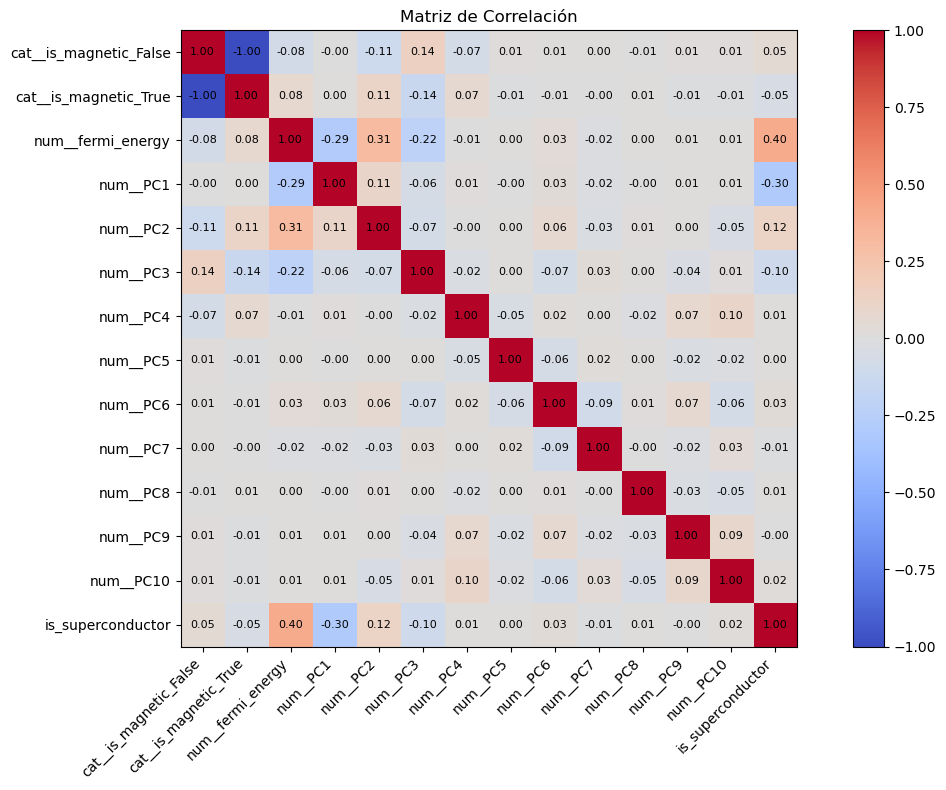

In [5]:
data_processed = pd.concat([X_sampled.reset_index(drop=True), y_sampled.reset_index(drop=True)], axis=1)

correlation_matrix = data_processed.loc[:, 'cat__is_magnetic_False':].corr()

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crea el mapa de colores
im = ax.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

# Agrega la barra de colores
cbar = ax.figure.colorbar(im, ax=ax)

# Agrega las etiquetas de los ejes
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(correlation_matrix.columns)

# Agrega los valores de correlación en cada celda
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", size=8)

# Añade un título
ax.set_title('Matriz de Correlación')

# Ajusta el diseño
fig.tight_layout()

# Muestra la gráfica
plt.show()

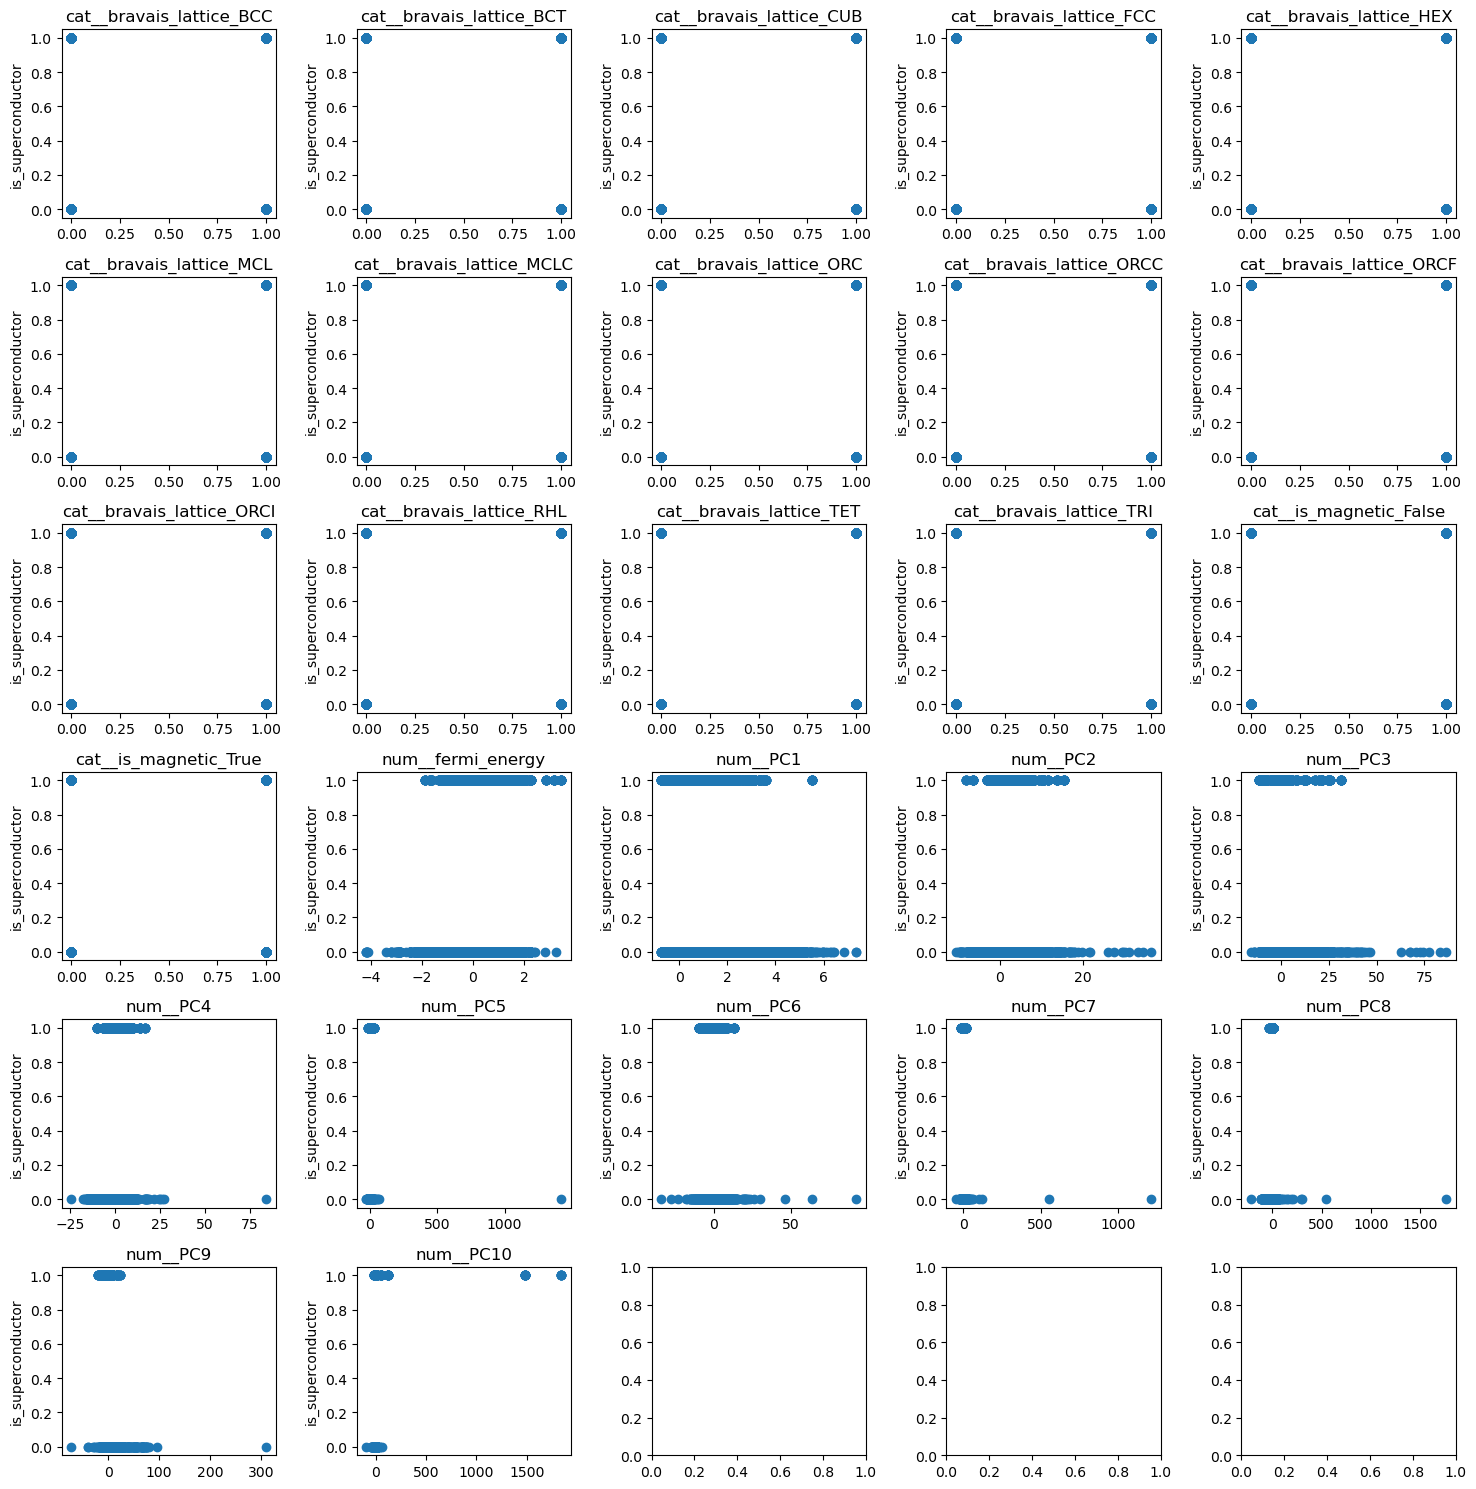

In [34]:
# Crear una figura y un eje
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

# Iterar sobre las columnas del dataframe
for i, column in enumerate(data_processed.columns):
    # Si la columna no es el target, trazar un gráfico
    if column != 'is_superconductor':
        # Obtener el eje correspondiente
        ax = axes[i // 5, i % 5]
        # Trazar un gráfico de dispersión
        ax.scatter(data_processed[column], data_processed['is_superconductor'])
        # Establecer el título del gráfico
        ax.set_title(column)
        # Establecer el eje y
        ax.set_ylabel('is_superconductor')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [39]:
data_processed.columns

Index(['cat__bravais_lattice_BCC', 'cat__bravais_lattice_BCT',
       'cat__bravais_lattice_CUB', 'cat__bravais_lattice_FCC',
       'cat__bravais_lattice_HEX', 'cat__bravais_lattice_MCL',
       'cat__bravais_lattice_MCLC', 'cat__bravais_lattice_ORC',
       'cat__bravais_lattice_ORCC', 'cat__bravais_lattice_ORCF',
       'cat__bravais_lattice_ORCI', 'cat__bravais_lattice_RHL',
       'cat__bravais_lattice_TET', 'cat__bravais_lattice_TRI',
       'cat__is_magnetic_False', 'cat__is_magnetic_True', 'num__fermi_energy',
       'num__PC1', 'num__PC2', 'num__PC3', 'num__PC4', 'num__PC5', 'num__PC6',
       'num__PC7', 'num__PC8', 'num__PC9', 'num__PC10', 'is_superconductor'],
      dtype='object')

C:\Users\olaya\AppData\Local\Temp\ipykernel_27976\243871908.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm', 2)


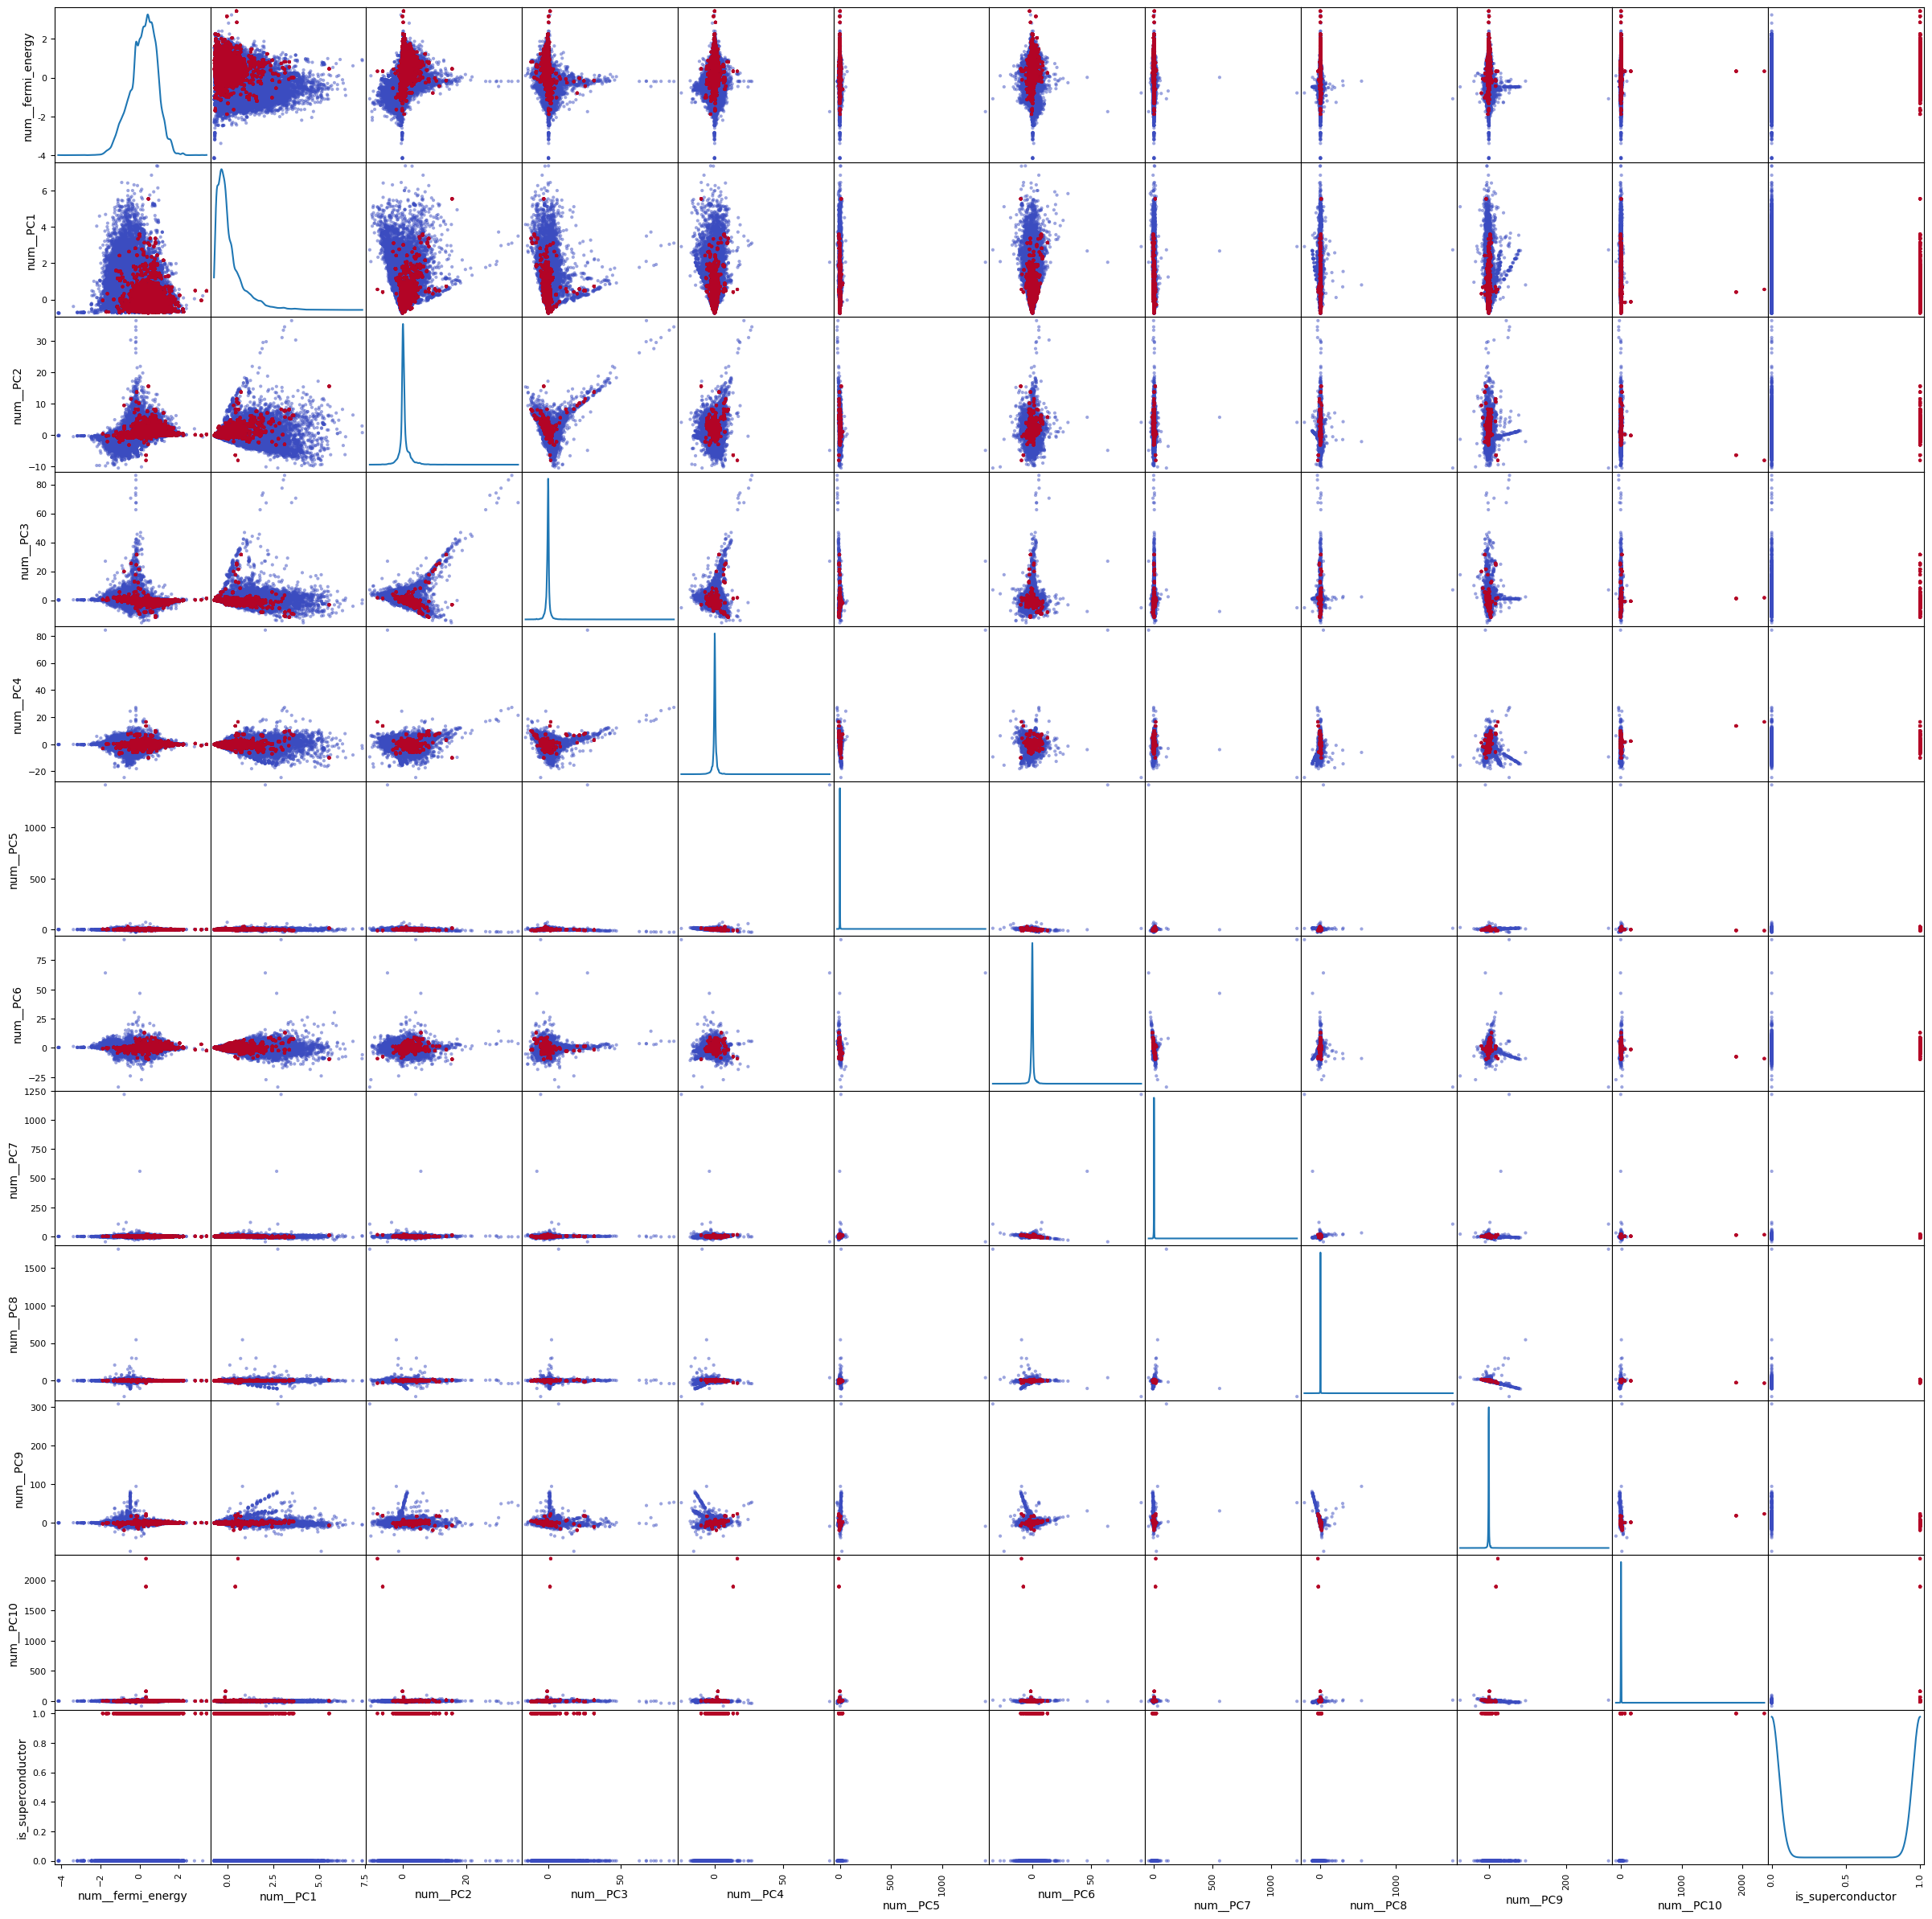

In [11]:
data_processed['is_superconductor'] = data_processed['is_superconductor'].astype(int)

cmap = plt.cm.get_cmap('coolwarm', 2) 

pd.plotting.scatter_matrix(data_processed.loc[:, 'num__fermi_energy':], 
                          alpha=0.5, 
                          figsize=(30, 30),
                          diagonal='kde', 
                          c=data_processed['is_superconductor'], 
                          cmap=cmap)
plt.show()

array([[<Axes: xlabel='num__fermi_energy', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC1', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC2', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC3', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC4', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC5', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC6', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC7', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC8', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC9', ylabel='num__fermi_energy'>,
        <Axes: xlabel='num__PC10', ylabel='num__fermi_energy'>,
        <Axes: xlabel='is_superconductor', ylabel='num__fermi_energy'>],
       [<Axes: xlabel='num__fermi_energy', ylabel='num__PC1'>,
        <Axes: xlabel='num__PC1', ylabel='num__PC1'>,
        <Axes: xlabel='num__PC2', ylabel='num__PC1'>,
        <Axes: xlabel='num__PC3', ylabel='num__PC1'>,

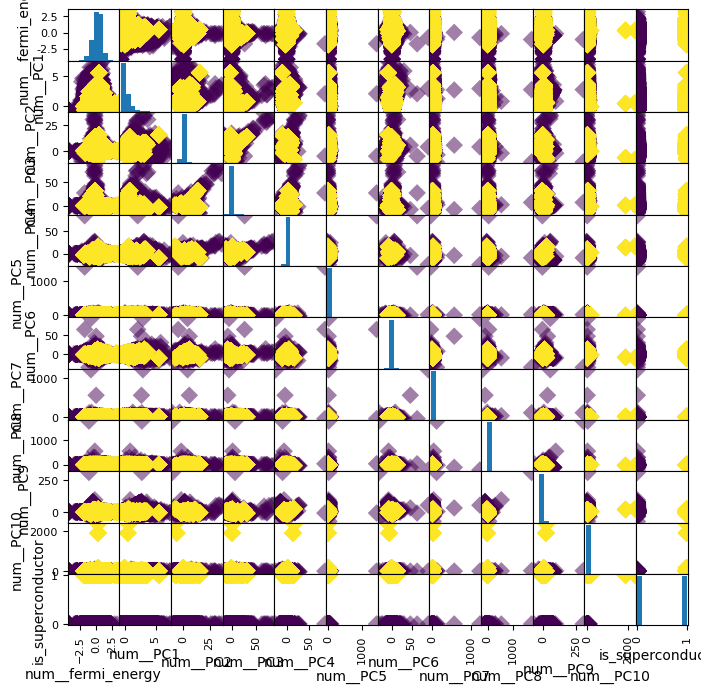

In [8]:
pd.plotting.scatter_matrix(data_processed.loc[:, 'num__fermi_energy':], c=data_processed['is_superconductor'], figsize = [8,8], s=80, marker = 'D')

In [5]:
materials_data

bravais_lattice material_name    ICSD  fermi_energy  is_magnetic  \
0                 BCC      Ag1F6Sb1   28676      -2.03066        False   
1                 BCC      Ag1F6Sb1  411795      -2.03253        False   
2                 BCC        Ag1Te3   37186       5.57824        False   
3                 BCC     Ag3Au1Se2   15734       2.21332        False   
4                 BCC     Ag3Au1Se2  171959       2.22832        False   
...               ...           ...     ...           ...          ...   
60212             TRI     Se4Tl4Zr1  261209       3.16038        False   
60213             TRI     Se6Si2Tl4   35042       2.64747        False   
60214             TRI    Se11Ta2Tl4  412581       2.44024        False   
60215             TRI     Si2Te6Tl6  416310       4.07369        False   
60216             TRI        Tl3Yb8  104202       2.27586        False   

       is_superconductor  DOS_m15_00  DOS_m14_98  DOS_m14_97  DOS_m14_95  \
0                  False         0.0         0.0         0.0         0.0   
1                  False         0.0         0.0         0.0         0.0   
2                  False         0.0         0.0         0.0         0.0   
3                  False         0.0         0.0         0.0         0.0   
4                  False         0.0         0.0         0.0         0.0   
...                  ...         ...         ...         ...         ...   
60212              False         0.0         0.0         0.0         0.0   
60213              False         0.0         0.0         0.0         0.0   
60214              False         0.0         0.0         0.0         0.0   
60215              False         0.0         0.0         0.0         0.0   
60216              False         0.0         0.0         0.0         0.0   

       DOS_m14_94  DOS_m14_92  DOS_m14_91  DOS_m14_89  DOS_m14_88  DOS_m14_86  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
60212         0.0         0.0         0.0         0.0         0.0         0.0   
60213         0.0         0.0         0.0         0.0         0.0         0.0   
60214         0.0         0.0         0.0         0.0         0.0         0.0   
60215         0.0         0.0         0.0         0.0         0.0         0.0   
60216         0.0         0.0         0.0         0.0         0.0         0.0   

       DOS_m14_85  DOS_m14_83  DOS_m14_82  DOS_m14_80  DOS_m14_79  DOS_m14_77  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0.0         0.0         0.0         0.0         0.0         0.0   
3             0.0         0.0         0.0         0.0         0.0         0.0   
4             0.0         0.0         0.0         0.0         0.0         0.0   
...           ...         ...         ...         ...         ...         ...   
60212         0.0         0.0         0.0         0.0         0.0         0.0   
60213         0.0         0.0         0.0         0.0         0.0         0.0   
60214         0.0         0.0         0.0         0.0         0.0         0.0   
60215         0.0         0.0         0.0         0.0         0.0         0.0   
60216         0.0         0.0         0.0         0.0         0.0         0.0   

       DOS_m14_76  DOS_m14_74  DOS_m14_73  DOS_m14_71  DOS_m14_70  DOS_m14_68  \
0             0.0         0.0         0.0         0.0         0.0         0.0   
1             0.0         0.0         0.0         0.0         0.0         0.0   
2             0

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu dataframe se llama 'df'
df = materials_data.copy()

# Filtrar los datos por superconductores y no superconductores
superconductors = df[df['is_superconductor'] == True]
non_superconductors = df[df['is_superconductor'] == False]


# Crear un histograma de la densidad de estados para superconductores
plt.figure(figsize=(10, 6))
sns.histplot(superconductors.loc[:,'DOS_m15_00':], kde=True, color='blue', label='Superconductors')

# Crear un histograma de la densidad de estados para no superconductores
sns.histplot(non_superconductors.loc[:,'DOS_m15_00':], kde=True, color='red', label='Non-Superconductors')

# Ajusta la leyenda y los títulos
plt.xlabel('Density of States')
plt.ylabel('Frequency')
plt.title('Distribution of Density of States for Superconductors and Non-Superconductors')
plt.legend()

# Muestra el gráfico
plt.show()

c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\olaya\anaconda3\envs\superconductor\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\olaya\anaconda3\envs\superconductor\lib

In [8]:
dos_supercon_df = materials_data[materials_data.is_superconductor == True].filter(regex='DOS_')
dos_nosupercon_df = materials_data[materials_data.is_superconductor == False ].filter(regex='DOS_')

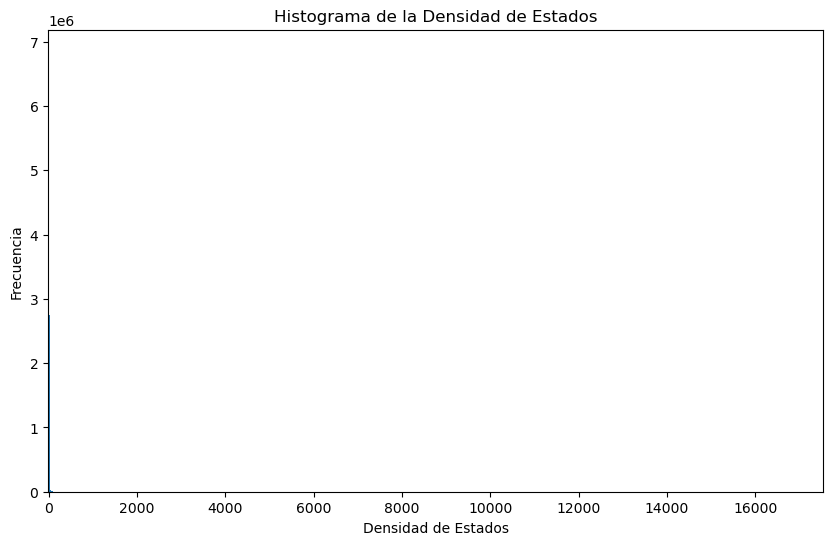

In [14]:
max_dos = dos_supercon_df.values.flatten().max()
min_dos = dos_supercon_df.values.flatten().min()

plt.figure(figsize=(10, 6)) 
plt.hist(dos_supercon_df.values.flatten(), bins=1000) 

# Ajustar los ejes del histogramab
plt.xlim(min_dos * 0.95, max_dos * 1.05)  # Ajustar los límites del eje x
plt.xlabel('Densidad de Estados')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Densidad de Estados')
plt.show()

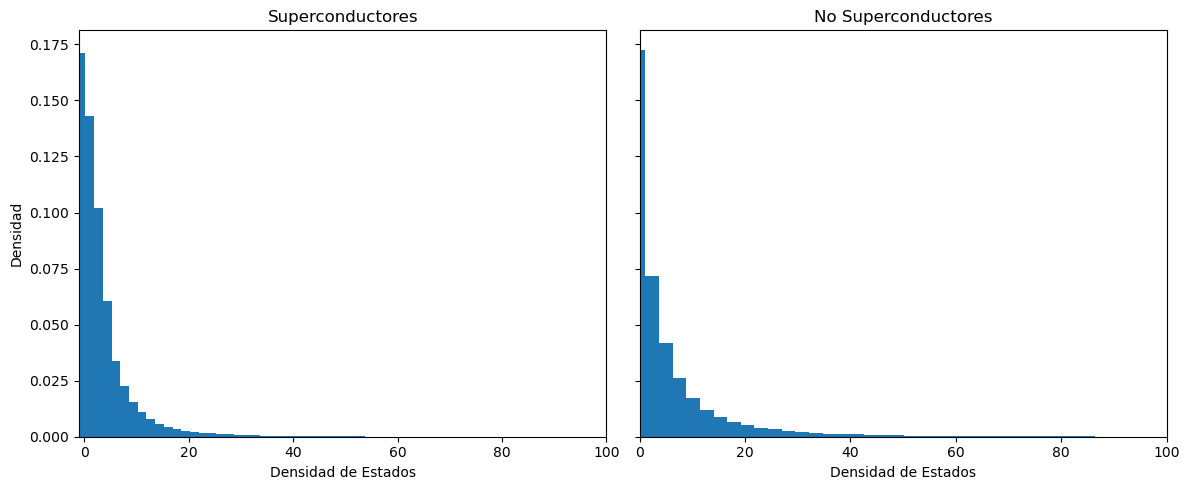

In [26]:
dos_supercon_df = materials_data[materials_data.is_superconductor == True].filter(regex='DOS_')
dos_nosupercon_df = materials_data[materials_data.is_superconductor == False ].filter(regex='DOS_')


fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma para superconductores
axs[0].hist(dos_supercon_df.values.flatten(), bins=10000, density=True)
axs[0].set_xlabel('Densidad de Estados')
axs[0].set_ylabel('Densidad')
axs[0].set_xlim(-1, 100) 
axs[0].set_title('Superconductores')

# Histograma para no superconductores
axs[1].hist(dos_nosupercon_df.values.flatten(), bins=10000, density=True)
axs[1].set_xlabel('Densidad de Estados')
axs[1].set_xlim(0, 100) 
axs[1].set_title('No Superconductores')

# Ajusta la figura
plt.tight_layout()
plt.show()

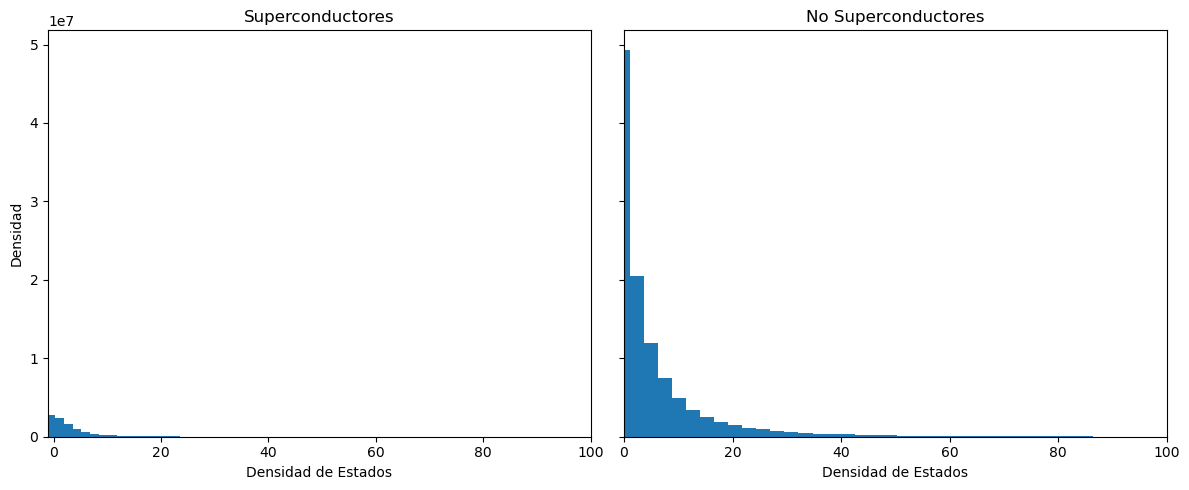

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histograma para superconductores
axs[0].hist(dos_supercon_df.values.flatten(), bins=10000, density=False)
axs[0].set_xlabel('Densidad de Estados')
axs[0].set_ylabel('Densidad')
axs[0].set_xlim(-1, 100) 
axs[0].set_title('Superconductores')

# Histograma para no superconductores
axs[1].hist(dos_nosupercon_df.values.flatten(), bins=10000, density=False)
axs[1].set_xlabel('Densidad de Estados')
axs[1].set_xlim(0, 100) 
axs[1].set_title('No Superconductores')

# Ajusta la figura
plt.tight_layout()
plt.show()